In [1]:
TEST = False

Check which hyper-parameters are required by Region:

In [2]:
from pykeen.kge_models import Region
from datetime import datetime
Region.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'corrupt_relations',
 'normalization_of_entities',
 'strict_norm',
 'init_radius',
 'reg_lambda',
 'loss_type',
 'neg_factor',
 'region_type',
 'gradient_matrix']

Train and evaluate Region (provide test set):
* Define the path to our test set: **test_set_path**
* Define the path to our the negative test set: **neg_test_path** in case of triple classfication evaluation
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [3]:
config = dict(
    metrics                     = [],
    training_set_path           = '../../../data/fb15k-237/train.tsv',
    test_set_path               = '../../../data/fb15k-237/valid_200.tsv',
    #neg_test_set_path           = '../../../data/fb15k-237/valid_neg.tsv',
    mapping_path                = '../../../data/fb15k-237/',
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    
    kg_embedding_model_name     = 'Region',
    region_type                 = 'triangle',
    embedding_dim               = 50,
    init_radius                 = 1,
    reg_lambda                  = 0,
    loss_type                   = 'MRL',
    neg_factor                  = 1,
    corrupt_relations           = False,
 
    normalization_of_entities   = 2,  # corresponds to L2
    strict_norm                 = True,
    
    margin_loss                 = 0.5,
    learning_rate               = 0.001,
    es_metric                   = 'custom',
    num_epochs                  = 1000 if not TEST else 2000,  
    batch_size                  = 14,
    test_batch_size             = 16,
    filter_negative_triples     = False,
    preferred_device            = 'gpu1'
)

In [4]:
time = datetime.now()
stamp = "{:04d}{:02d}{:02d}-{:02d}{:02d}".format(time.year, time.month, time.day, time.hour, time.minute)
stamp

'20191030-1431'

In [5]:
output_directory = '../../../models/fb15k-237_region{}_dim{}_{}_rad{}_regL{}_lr{}_loss-{}_margin{}_negfactor{}_epochs{}_esmetric-{}_bs{}'.format(
    stamp,
    config['embedding_dim'], config['region_type'], config['init_radius'], 
    str(config['reg_lambda']).replace('.',''), 
    str(config['learning_rate']).replace('.',''),
    config['loss_type'],
    config['margin_loss'],
    config['neg_factor'],
    config['num_epochs'],
    config['es_metric'],
    config['batch_size']
)
output_directory

'../../../models/fb15k-237_region20191030-1431_dim50_triangle_rad1_regL0_lr0001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom_bs14'

In [6]:
if TEST:
    output_directory = '../../../models/test'

In [7]:
import logging
import os
import sys
import time
import pykeen

In [8]:
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('pykeen').setLevel(logging.DEBUG)

In [9]:
print(sys.version)

3.6.5 (default, Mar 31 2018, 19:45:04) [GCC]


In [10]:
print(time.asctime())

Wed Oct 30 14:31:46 2019


In [11]:
print(pykeen.get_version())

0.0.26-dev


## Train and evaluate Region:

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [14]:
# my
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

DEBUG:pykeen.utilities.pipeline:Reading the label mappings...
INFO:pykeen.utilities.pipeline:{'metrics': [], 'training_set_path': '../../../data/fb15k-237/train.tsv', 'test_set_path': '../../../data/fb15k-237/valid_200.tsv', 'mapping_path': '../../../data/fb15k-237/', 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'region_type': 'triangle', 'embedding_dim': 50, 'init_radius': 1, 'reg_lambda': 0, 'loss_type': 'MRL', 'neg_factor': 1, 'corrupt_relations': False, 'normalization_of_entities': 2, 'strict_norm': True, 'margin_loss': 0.5, 'learning_rate': 0.001, 'es_metric': 'custom', 'num_epochs': 1000, 'batch_size': 14, 'test_batch_size': 16, 'filter_negative_triples': False, 'preferred_device': 'cuda:1', 'pykeen-version': '0.0.26-dev', 'num_entities': 14541, 'num_relations': 237}
/mounts/Users/student/speranskaya/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use re

INFO:pykeen.utilities.train_utils:Epoch  47 / 1000 (8.9s):  0.171 ---- 0.151 ---- 0.09 ----  13
INFO:pykeen.utilities.train_utils:Epoch  48 / 1000 (8.9s):  0.181 ---- 0.136 ---- 0.09 ----  14
INFO:pykeen.utilities.train_utils:Epoch  49 / 1000 (8.9s):  0.177 ---- 0.142 ---- 0.09 ----  15
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.08s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.09716305041440623  ---- rank/hits@10: (0.07371145408078322, 0.1425)
INFO:pykeen.utilities.train_utils:Epoch  50 / 1000 (8.9s):  0.171 ---- 0.121 ---- 0.10 ----  16
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 47.80s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.09478979066139599  ---- rank/hits@10: (0.07303582244204865, 0.135)
INFO:pykeen.utilities.train_utils:Epoch  51 / 1000 (8.7s):  0.172 ---- 0.116 ---- 0.09 ----  17
INFO:pykeen.utilities.train_utils:Epoch  52 / 1000 (8.7s):  0.171 ---- 0.132 ---- 0.09 ----  

INFO:pykeen.utilities.train_utils:Epoch  96 / 1000 (9.7s):  0.142 ---- 0.097 ---- 0.12 ----  27
INFO:pykeen.utilities.train_utils:Epoch  97 / 1000 (9.8s):  0.147 ---- 0.096 ---- 0.12 ----  28
INFO:pykeen.utilities.train_utils:Epoch  98 / 1000 (9.9s):  0.146 ---- 0.104 ---- 0.12 ----  29
INFO:pykeen.utilities.train_utils:Epoch  99 / 1000 (10.1s):  0.147 ---- 0.096 ---- 0.12 ----  30
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 50.24s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11033090511045428  ---- rank/hits@10: (0.08564815852739063, 0.155)
INFO:pykeen.utilities.train_utils:Epoch 100 / 1000 (10.0s):  0.143 ---- 0.102 ---- 0.11 ----  31
INFO:pykeen.utilities.train_utils:Epoch 101 / 1000 (9.8s):  0.144 ---- 0.102 ---- 0.11 ----  32
INFO:pykeen.utilities.train_utils:Epoch 102 / 1000 (9.7s):  0.143 ---- 0.095 ---- 0.11 ----  33
INFO:pykeen.utilities.train_utils:Epoch 103 / 1000 (9.8s):  0.140 ---- 0.103 ---- 0.11 ----  34
INFO:pykeen.utili

INFO:pykeen.utilities.train_utils:Epoch 148 / 1000 (9.2s):  0.131 ---- 0.085 ---- 0.11 ----  79
INFO:pykeen.utilities.train_utils:Epoch 149 / 1000 (9.2s):  0.139 ---- 0.083 ---- 0.11 ----  80
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11604173879581091  ---- rank/hits@10: (0.08679883405161544, 0.175)
INFO:pykeen.utilities.train_utils:Epoch 150 / 1000 (9.1s):  0.133 ---- 0.079 ---- 0.12 ----  81
INFO:pykeen.utilities.train_utils:Epoch 151 / 1000 (9.2s):  0.137 ---- 0.083 ---- 0.12 ----  82
INFO:pykeen.utilities.train_utils:Epoch 152 / 1000 (9.2s):  0.134 ---- 0.088 ---- 0.12 ----  83
INFO:pykeen.utilities.train_utils:Epoch 153 / 1000 (9.2s):  0.133 ---- 0.086 ---- 0.12 ----  84
INFO:pykeen.utilities.train_utils:Epoch 154 / 1000 (9.2s):  0.136 ---- 0.089 ---- 0.12 ----  85
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.93s seconds
DEBUG:pykeen.utilities.

Epoch   171: reducing learning rate of group 0 to 1.0000e-04.


INFO:pykeen.utilities.train_utils:Epoch 172 / 1000 (9.2s):  0.120 ---- 0.076 ---- 0.09 ---- 103
INFO:pykeen.utilities.train_utils:Epoch 173 / 1000 (9.1s):  0.118 ---- 0.077 ---- 0.09 ---- 104
INFO:pykeen.utilities.train_utils:Epoch 174 / 1000 (9.2s):  0.118 ---- 0.076 ---- 0.09 ---- 105
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.10219199760793161  ---- rank/hits@10: (0.07401706449402495, 0.165)
INFO:pykeen.utilities.train_utils:Epoch 175 / 1000 (9.2s):  0.118 ---- 0.074 ---- 0.10 ---- 106
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.10607662495961488  ---- rank/hits@10: (0.07708945820408611, 0.17)
INFO:pykeen.utilities.train_utils:Epoch 176 / 1000 (9.3s):  0.118 ---- 0.073 ---- 0.11 ---- 107
INFO:pykeen.utilities.train_utils:Epoch 177 / 1000 (9.2s):  0.118 ---- 0.074 ---- 0.11 ---- 108

INFO:pykeen.utilities.train_utils:Epoch 225 / 1000 (9.2s):  0.114 ---- 0.071 ---- 0.11 ---- 156
INFO:pykeen.utilities.train_utils:Epoch 226 / 1000 (9.2s):  0.114 ---- 0.072 ---- 0.11 ---- 157
INFO:pykeen.utilities.train_utils:Epoch 227 / 1000 (9.2s):  0.114 ---- 0.071 ---- 0.11 ---- 158
INFO:pykeen.utilities.train_utils:Epoch 228 / 1000 (9.2s):  0.115 ---- 0.072 ---- 0.11 ---- 159
INFO:pykeen.utilities.train_utils:Epoch 229 / 1000 (9.2s):  0.114 ---- 0.072 ---- 0.11 ---- 160
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.94s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1095732899848622  ---- rank/hits@10: (0.07975538885069618, 0.175)
INFO:pykeen.utilities.train_utils:Epoch 230 / 1000 (9.1s):  0.114 ---- 0.073 ---- 0.11 ---- 161
INFO:pykeen.utilities.train_utils:Epoch 231 / 1000 (9.1s):  0.114 ---- 0.071 ---- 0.11 ---- 162
INFO:pykeen.utilities.train_utils:Epoch 232 / 1000 (9.2s):  0.114 ---- 0.071 ---- 0.11 ---- 163
INFO:pykeen.utilitie

Epoch   272: reducing learning rate of group 0 to 1.0000e-05.


INFO:pykeen.utilities.train_utils:Epoch 273 / 1000 (9.3s):  0.113 ---- 0.071 ---- 0.11 ---- 204
INFO:pykeen.utilities.train_utils:Epoch 274 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 205
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11270506963602182  ---- rank/hits@10: (0.08203529487897253, 0.18)
INFO:pykeen.utilities.train_utils:Epoch 275 / 1000 (9.3s):  0.113 ---- 0.071 ---- 0.11 ---- 206
INFO:pykeen.utilities.train_utils:Epoch 276 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 207
INFO:pykeen.utilities.train_utils:Epoch 277 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 208
INFO:pykeen.utilities.train_utils:Epoch 278 / 1000 (9.3s):  0.113 ---- 0.071 ---- 0.11 ---- 209
INFO:pykeen.utilities.train_utils:Epoch 279 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 210
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.91s seconds
DEBUG:pykeen.utilities.t

INFO:pykeen.utilities.train_utils:Epoch 332 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 263
INFO:pykeen.utilities.train_utils:Epoch 333 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 264
INFO:pykeen.utilities.train_utils:Epoch 334 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 265
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.95s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11194981407202252  ---- rank/hits@10: (0.08175715612771577, 0.1775)
INFO:pykeen.utilities.train_utils:Epoch 335 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 266
INFO:pykeen.utilities.train_utils:Epoch 336 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 267
INFO:pykeen.utilities.train_utils:Epoch 337 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 268
INFO:pykeen.utilities.train_utils:Epoch 338 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 269
INFO:pykeen.utilities.train_utils:Epoch 339 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 270
DEBUG:pykeen.utili

INFO:pykeen.utilities.train_utils:Epoch 391 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 322
INFO:pykeen.utilities.train_utils:Epoch 392 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 323
INFO:pykeen.utilities.train_utils:Epoch 393 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 324
INFO:pykeen.utilities.train_utils:Epoch 394 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 325
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11410148905696221  ---- rank/hits@10: (0.08299579648610682, 0.1825)
INFO:pykeen.utilities.train_utils:Epoch 395 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 326
INFO:pykeen.utilities.train_utils:Epoch 396 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 327
INFO:pykeen.utilities.train_utils:Epoch 397 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 328
INFO:pykeen.utilities.train_utils:Epoch 398 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 329
INFO:pykeen.utilit

INFO:pykeen.utilities.train_utils:Epoch 448 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 379
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.94s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11462636887308482  ---- rank/hits@10: (0.08303863694909765, 0.185)
INFO:pykeen.utilities.train_utils:Epoch 449 / 1000 (9.1s):  0.113 ---- 0.070 ---- 0.11 ---- 380
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11457716937861284  ---- rank/hits@10: (0.08298700740053783, 0.185)
INFO:pykeen.utilities.train_utils:Epoch 450 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 381
INFO:pykeen.utilities.train_utils:Epoch 451 / 1000 (9.1s):  0.113 ---- 0.070 ---- 0.11 ---- 382
INFO:pykeen.utilities.train_utils:Epoch 452 / 1000 (9.1s):  0.113 ---- 0.071 ---- 0.11 ---- 383
INFO:pykeen.utilities.train_utils:Epoch 453 / 1000 (9.2s):  0.113 ---- 0.071 ---- 0.11 ---- 38

INFO:pykeen.utilities.train_utils:Epoch 503 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 434
INFO:pykeen.utilities.train_utils:Epoch 504 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 435
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11296105085201905  ---- rank/hits@10: (0.08284033043778663, 0.1775)
INFO:pykeen.utilities.train_utils:Epoch 505 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 436
INFO:pykeen.utilities.train_utils:Epoch 506 / 1000 (9.1s):  0.113 ---- 0.070 ---- 0.11 ---- 437
INFO:pykeen.utilities.train_utils:Epoch 507 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 438
INFO:pykeen.utilities.train_utils:Epoch 508 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 439
INFO:pykeen.utilities.train_utils:Epoch 509 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 440
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.90s seconds
DEBUG:pykeen.utilities

INFO:pykeen.utilities.train_utils:Epoch 558 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 489
INFO:pykeen.utilities.train_utils:Epoch 559 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 490
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.96s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1138962948872874  ---- rank/hits@10: (0.0838501935631497, 0.1775)
INFO:pykeen.utilities.train_utils:Epoch 560 / 1000 (9.1s):  0.113 ---- 0.070 ---- 0.11 ---- 491
INFO:pykeen.utilities.train_utils:Epoch 561 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 492
INFO:pykeen.utilities.train_utils:Epoch 562 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 493
INFO:pykeen.utilities.train_utils:Epoch 563 / 1000 (9.1s):  0.113 ---- 0.070 ---- 0.11 ---- 494
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11504292039255783  ---- rank/hits@10: (0.08399575240923358, 0.1825

DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11426066881458555  ---- rank/hits@10: (0.08424576331055995, 0.1775)
INFO:pykeen.utilities.train_utils:Epoch 615 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 546
INFO:pykeen.utilities.train_utils:Epoch 616 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 547
INFO:pykeen.utilities.train_utils:Epoch 617 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 548
INFO:pykeen.utilities.train_utils:Epoch 618 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 549
INFO:pykeen.utilities.train_utils:Epoch 619 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 550
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.96s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11384075647134258  ---- rank/hits@10: (0.0837900052181168, 0.1775)
INFO:pykeen.utilities.train_utils:Epoch 620 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 5

INFO:pykeen.utilities.train_utils:Epoch 670 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 601
INFO:pykeen.utilities.train_utils:Epoch 671 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.11 ---- 602
INFO:pykeen.utilities.train_utils:Epoch 672 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 603
INFO:pykeen.utilities.train_utils:Epoch 673 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 604
INFO:pykeen.utilities.train_utils:Epoch 674 / 1000 (9.1s):  0.112 ---- 0.070 ---- 0.11 ---- 605
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11542925741260232  ---- rank/hits@10: (0.08495401418198513, 0.18)
INFO:pykeen.utilities.train_utils:Epoch 675 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.12 ---- 606
INFO:pykeen.utilities.train_utils:Epoch 676 / 1000 (9.1s):  0.112 ---- 0.070 ---- 0.12 ---- 607
INFO:pykeen.utilities.train_utils:Epoch 677 / 1000 (9.2s):  0.113 ---- 0.070 ---- 0.12 ---- 608
INFO:pykeen.utilitie

INFO:pykeen.utilities.train_utils:Epoch 729 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.12 ---- 660
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.98s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11465000928663152  ---- rank/hits@10: (0.08466976257405444, 0.1775)
INFO:pykeen.utilities.train_utils:Epoch 730 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 661
INFO:pykeen.utilities.train_utils:Epoch 731 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 662
INFO:pykeen.utilities.train_utils:Epoch 732 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.11 ---- 663
INFO:pykeen.utilities.train_utils:Epoch 733 / 1000 (9.1s):  0.112 ---- 0.069 ---- 0.11 ---- 664
INFO:pykeen.utilities.train_utils:Epoch 734 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.11 ---- 665
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.90s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11336431138479204  ---- rank/hits@10: (0.08327480673951303, 0.17

INFO:pykeen.utilities.train_utils:Epoch 782 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 713
INFO:pykeen.utilities.train_utils:Epoch 783 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 714
INFO:pykeen.utilities.train_utils:Epoch 784 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 715
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.96s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11638833032125848  ---- rank/hits@10: (0.08657970777304333, 0.1775)
INFO:pykeen.utilities.train_utils:Epoch 785 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 716
INFO:pykeen.utilities.train_utils:Epoch 786 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.12 ---- 717
INFO:pykeen.utilities.train_utils:Epoch 787 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 718
INFO:pykeen.utilities.train_utils:Epoch 788 / 1000 (9.2s):  0.112 ---- 0.070 ---- 0.12 ---- 719
INFO:pykeen.utilities.train_utils:Epoch 789 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 720
DEBUG:pykeen.utili

DEBUG:pykeen.utilities.train_utils:
current metric: 0.11824176200449815  ---- rank/hits@10: (0.08745046058488339, 0.1825)
INFO:pykeen.utilities.train_utils:Epoch 838 / 1000 (9.2s):  0.113 ---- 0.069 ---- 0.12 ---- 769
INFO:pykeen.utilities.train_utils:Epoch 839 / 1000 (9.1s):  0.112 ---- 0.069 ---- 0.12 ---- 770
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.93s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11953658762906869  ---- rank/hits@10: (0.08829340981199647, 0.185)
INFO:pykeen.utilities.train_utils:Epoch 840 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 771
INFO:pykeen.utilities.train_utils:Epoch 841 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 772
INFO:pykeen.utilities.train_utils:Epoch 842 / 1000 (9.1s):  0.112 ---- 0.069 ---- 0.12 ---- 773
INFO:pykeen.utilities.train_utils:Epoch 843 / 1000 (9.2s):  0.113 ---- 0.069 ---- 0.12 ---- 774
INFO:pykeen.utilities.train_utils:Epoch 844 / 1000 (9.2s):  0.113 ---- 0.069 ---- 0.12 --

INFO:pykeen.utilities.train_utils:Epoch 896 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 827
INFO:pykeen.utilities.train_utils:Epoch 897 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 828
INFO:pykeen.utilities.train_utils:Epoch 898 / 1000 (9.2s):  0.111 ---- 0.069 ---- 0.12 ---- 829
INFO:pykeen.utilities.train_utils:Epoch 899 / 1000 (9.1s):  0.112 ---- 0.069 ---- 0.12 ---- 830
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.91s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.1185090761042457  ---- rank/hits@10: (0.08774321604706099, 0.1825)
INFO:pykeen.utilities.train_utils:Epoch 900 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 831
INFO:pykeen.utilities.train_utils:Epoch 901 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 832
INFO:pykeen.utilities.train_utils:Epoch 902 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 833
INFO:pykeen.utilities.train_utils:Epoch 903 / 1000 (9.1s):  0.112 ---- 0.069 ---- 0.12 ---- 834
INFO:pykeen.utiliti

DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.119222007088078  ---- rank/hits@10: (0.08912758602362889, 0.18)
INFO:pykeen.utilities.train_utils:Epoch 955 / 1000 (9.2s):  0.112 ---- 0.068 ---- 0.12 ---- 886
INFO:pykeen.utilities.train_utils:Epoch 956 / 1000 (9.3s):  0.112 ---- 0.069 ---- 0.12 ---- 887
INFO:pykeen.utilities.train_utils:Epoch 957 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 888
INFO:pykeen.utilities.train_utils:Epoch 958 / 1000 (9.1s):  0.112 ---- 0.069 ---- 0.12 ---- 889
INFO:pykeen.utilities.train_utils:Epoch 959 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 890
DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 48.92s seconds
DEBUG:pykeen.utilities.train_utils:
current metric: 0.11726231393331502  ---- rank/hits@10: (0.08695483939893091, 0.18)
INFO:pykeen.utilities.train_utils:Epoch 960 / 1000 (9.2s):  0.112 ---- 0.069 ---- 0.12 ---- 891
IN

Check result entries:

In [15]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'metric_per_epoch', 'entity_to_embedding', 'relation_to_embedding', 'relation_to_radius', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration', 'search_summary'])

Visualize loss values:

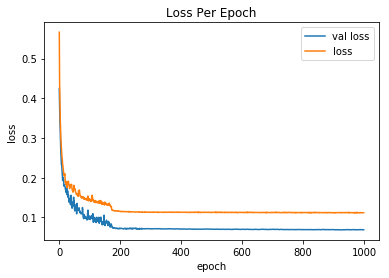

In [16]:
val_losses = results.results['validation_losses']
epochs = np.arange(len(val_losses))
#plt.title(r'Validation Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title('Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses) #plt.subplot(122)

plt.legend(["val loss", "loss"])
plt.show()

from sklearn.preprocessing import minmax_scale
metric = minmax_scale(results.results['metric_per_epoch'], feature_range=(0,1))
epochs = np.arange(len(metric)) * (len(losses) // len(metric))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, metric)

val_losses = - 
minmax_scale(results.results['validation_losses'], feature_range=(0,1))
epochs = np.arange(len(val_losses))
plt.title(r'Early stopping evaluation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

plt.legend(["metric", "val_loss"])
plt.show()

In [17]:
results.results['eval_summary']

{'mean_rank': None,
 'hits@k': None,
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

## Load and evaluate

In [18]:
import torch
import json
import os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
from pykeen.utilities.pipeline import Pipeline

In [19]:
model_dir = '../../../models/'
models = os.listdir(model_dir)
models

['fb15k-237_regionellipse_20191030-1434_dim50_ellipse_rad0_regL0_lr001_loss-BPR_margin0.0_negfactor1_epochs1000_esmetric-custom_bs16384',
 'fb15k-237_regionellipse_20191030-1444_dim50_ellipse_rad0_regL0_lr001_loss-BPR_margin0.0_negfactor1_epochs1000_esmetric-custom_bs256',
 'fb15k-237_regionellipse_20191030-1453_dim50_ellipse_rad0_regL0_lr001_loss-BPR_margin0.0_negfactor1_epochs1000_esmetric-custom_bs14',
 'test',
 'fb15k-237_regionellipse_20191030-15 6_dim50_ellipse_rad0_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom_bs10',
 'FB15k237_region_20191029-1121_dim50_triangle_rad1_regL0_lr0001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom_bs16384',
 'fb15k-237_regionsphere_20191030-1453_dim50_sphere_rad0_regL0_lr001_loss-BPR_margin0.0_negfactor1_epochs1000_esmetric-custom_bs14',
 'fb15k-237_regionfull_20191030-14 7_dim50_full_rad0_regL0_lr001_loss-MRL_margin0.5_negfactor1_epochs1000_esmetric-custom_bs16384',
 'fb15k-237_regionfull_20191030-1412_dim50_full_ra

In [21]:
model_path = ''
if model_path:
    input_directory = os.path.join(model_dir, model_path)
    results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
    }
    # Initialize KG embedding model
    config = results['final_configuration']
    config['training_set_path'] = '../../../data/fb15k-237/train.tsv'
    config['test_set_path'] = '../../../data/fb15k-237/valid.tsv'
    relation_to_id = results['relation_to_id']
    entity_to_id = results['entity_to_id']
else:
    # Initialize KG embedding model
    input_directory = output_directory
    config[pkc.NUM_ENTITIES] = 14541
    config[pkc.NUM_RELATIONS] = 237
    config[pkc.PREFERRED_DEVICE] = 'gpu1'
    relation_to_id = json.load(open(os.path.join(input_directory, 'relation_to_id.json'),'r'))
    entity_to_id = json.load(open(os.path.join(input_directory, 'entity_to_id.json'),'r'))

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [22]:
config[pkc.PREFERRED_DEVICE] = 'gpu1'
pipeline = Pipeline(config)
config[pkc.PREFERRED_DEVICE] = pipeline.device_name
config['test_batch_size'] = 2**10
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
pipeline.entity_label_to_id = entity_to_id
pipeline.relation_label_to_id = relation_to_id

model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(input_directory, 'best_model.pkl')))

#results['trained_model'] = model 
type(model)

pykeen.kge_models.region.Region

In [23]:
config

{'metrics': [],
 'training_set_path': '../../../data/fb15k-237/train.tsv',
 'test_set_path': '../../../data/fb15k-237/valid_200.tsv',
 'mapping_path': '../../../data/fb15k-237/',
 'execution_mode': 'Training_mode',
 'random_seed': 2,
 'kg_embedding_model_name': 'Region',
 'region_type': 'triangle',
 'embedding_dim': 50,
 'init_radius': 1,
 'reg_lambda': 0,
 'loss_type': 'MRL',
 'neg_factor': 1,
 'corrupt_relations': False,
 'normalization_of_entities': 2,
 'strict_norm': True,
 'margin_loss': 0.5,
 'learning_rate': 0.001,
 'es_metric': 'custom',
 'num_epochs': 1000,
 'batch_size': 14,
 'test_batch_size': 1024,
 'filter_negative_triples': False,
 'preferred_device': 'cuda:1',
 'pykeen-version': '0.0.26-dev',
 'num_entities': 14541,
 'num_relations': 237}

In [24]:
metrics =  [pkc.MEAN_RANK, pkc.HITS_AT_K] #  [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]

#### Evaluate RelationalTriple

In [25]:
val_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k-237/valid.tsv', 
    #neg_test_path = '../../../data/fb15k-237/valid_neg.tsv', 
    metrics=metrics,
    filter_neg_triples=False,
    threshold_search=True,
    single_threshold=False
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------


DEBUG:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 4496.29s seconds
INFO:pykeen.utilities.pipeline:MetricResults(mean_rank=0.06611058045314386, hits_at_k={1: 0.02155688622754491, 3: 0.07251211861990305, 5: 0.09572284003421729, 10: 0.15132591958939265}, precision=None, recall=None, accuracy=None, fscore=None)


In [ ]:
val_results['eval_summary']

In [ ]:
json.dumps(val_results['eval_summary'])

In [ ]:
from datetime import datetime
time = datetime.now()
print("{:04d}{:02d}{:02d}-{:02d}{:02d}".format(time.year, time.month, time.day, time.hour, time.minute))

In [ ]:
val_results_ = pipeline.evaluate(
    model, 
    '../../../data/fb15k/valid.tsv', 
    neg_test_path = '../../../data/fb15k/valid.tsv', 
    metrics= ['prediction'],
    threshold_search=True,
    single_threshold=True
)

In [ ]:
test_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/test.tsv', 
    neg_test_path = '../../../data/fb15k/test_neg.tsv',
    metrics= ['prediction'],
    threshold_search=False
)

In [ ]:
model.relation_thresholds.mean()

In [ ]:
json.dump(model.relation_thresholds[0], open(os.path.join(input_directory, 'threshold.json'),"w"))

In [ ]:
val_results_ = pipeline.evaluate(
    model, 
    '../../../data/fb15k/valid.tsv', 
    neg_test_path = '../../../data/fb15k/valid_neg.tsv', 
    metrics= ['prediction'],
    threshold_search=True,
    single_threshold=False
)

In [ ]:
test_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/test.tsv', 
    neg_test_path = '../../../data/fb15k/test_neg.tsv',
    metrics= ['prediction'],
    threshold_search=False
)

In [ ]:
model.relation_thresholds.mean()

In [ ]:
json.dump(model.relation_thresholds.tolist(), open(os.path.join(input_directory, 'mult_thresholds.json'),"w"))

In [ ]:
val_results['eval_summary']

In [ ]:
test_results = pipeline.evaluate(
    model, 
    '../../../data/fb15k/test.tsv', 
    neg_test_path = '../../../data/fb15k/test_neg.tsv',
    metrics= metrics,
    threshold_search=False
)

In [ ]:
test_results['eval_summary']

In [ ]:
json.dump(val_results['eval_summary'], open(os.path.join(input_directory, 'valid_evaluation_summary.json'),"w"))

In [ ]:
json.dump(test_results['eval_summary'], open(os.path.join(input_directory, 'evaluation_summary.json'),"w"))

## Load results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [ ]:
%matplotlib inline

In [ ]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

In [ ]:
#output_directory = 'D:/uni/master/models/region_hpo/'
model_path = 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_negfactor1_epochs500_esmetric-prediction'
input_directory = os.path.join(model_dir, model_path)


results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
}

In [ ]:
results.keys()

In [ ]:
results['final_configuration']

In [ ]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
results['eval_summary']

### 